<a href="https://colab.research.google.com/github/CopypastCore/IAD/blob/main/IAD_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import tensorflow as tf
from tensorflow.keras import layers, models


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/V8_classification_lr3.csv')
df = dataset
print(df.head())

      0     1     2    3     4     5     6     7     8     9  ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  Class  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278      1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028      1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259      1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191      1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191      1  

[5 rows x 58 columns]


In [23]:
print("Размер датасета:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистики:")
print(df.describe().T)
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())

Размер датасета: (4601, 58)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   

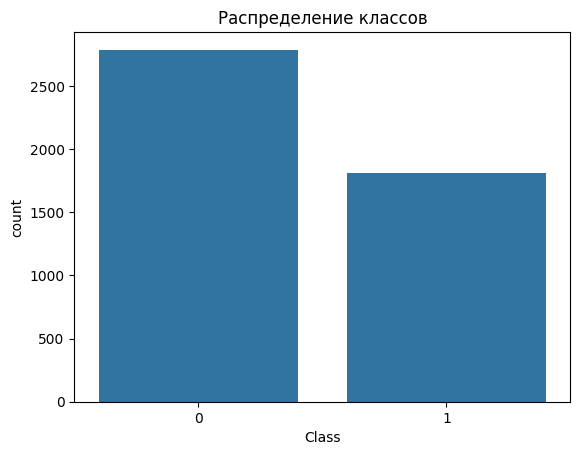

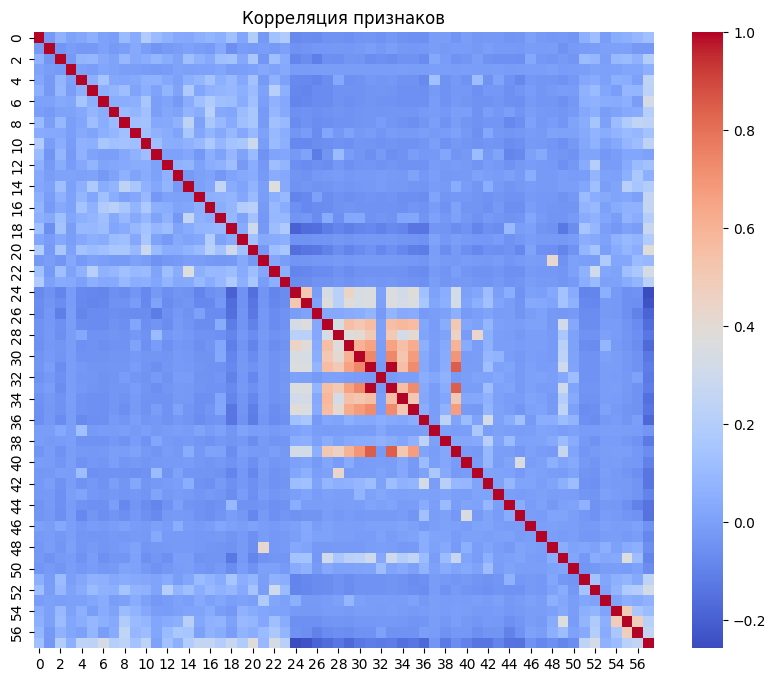

In [7]:
sns.countplot(x='Class', data=df)
plt.title("Распределение классов")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['4', '5', '6', '8', '10', '15', '16', '18', '20', '22', '24', '25',
       '51', '52', '56'],
      dtype='object')


In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_selected_scaled = scaler.fit_transform(X_selected)


In [10]:
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
datasets = {
    "Исходный": split_data(X, y),
    "Стандартизованный": split_data(X_scaled, y),
    "Отобранные": split_data(X_selected, y),
    "Стандартизованные отобранные": split_data(X_selected_scaled, y)
}


In [12]:
def dense_model(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [13]:
def cnn1d_model(input_dim):
    model = models.Sequential([
        layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [24]:
def evaluate_model(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype(int).flatten()
    return {
        "accuracy": accuracy_score(y, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y, y_pred),
        "f1_macro": f1_score(y, y_pred, average='macro'),
        "f1_per_class": f1_score(y, y_pred, average=None)
    }
print(accuracy_score, balanced_accuracy_score, f1_score)

accuracy balanced_accuracy f1_macro f1_per_class


In [15]:
results = []

for name, (X_train, X_val, X_test, y_train, y_val, y_test) in datasets.items():

    # Dense
    dense = dense_model(X_train.shape[1])
    dense.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    dense_metrics = evaluate_model(dense, X_val, y_val)

    # CNN
    cnn = cnn1d_model(X_train.shape[1])
    cnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    cnn_metrics = evaluate_model(cnn, X_val, y_val)

    results.append((name, "Dense", dense_metrics))
    results.append((name, "CNN1D", cnn_metrics))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:
for dataset, model, metrics in results:
    print(f"\nНабор данных: {dataset}")
    print(f"Модель: {model}")
    for k, v in metrics.items():
        print(f"  {k}: {v}")


Набор данных: Исходный
Модель: Dense
  accuracy: 0.8956521739130435
  balanced_accuracy: 0.9061708415423586
  f1_macro: 0.893503910001372
  f1_per_class: [0.90862944 0.87837838]

Набор данных: Исходный
Модель: CNN1D
  accuracy: 0.9507246376811594
  balanced_accuracy: 0.9490571348156487
  f1_macro: 0.9484807758189053
  f1_per_class: [0.95923261 0.93772894]

Набор данных: Стандартизованный
Модель: Dense
  accuracy: 0.946376811594203
  balanced_accuracy: 0.9467527441598649
  f1_macro: 0.944176100023834
  f1_per_class: [0.95525998 0.93309222]

Набор данных: Стандартизованный
Модель: CNN1D
  accuracy: 0.9434782608695652
  balanced_accuracy: 0.9469286518435125
  f1_macro: 0.9414963117240001
  f1_per_class: [0.95226438 0.93072824]

Набор данных: Отобранные
Модель: Dense
  accuracy: 0.9115942028985508
  balanced_accuracy: 0.8974985927385308
  f1_macro: 0.9053670315735514
  f1_per_class: [0.92964245 0.88109162]

Набор данных: Отобранные
Модель: CNN1D
  accuracy: 0.9231884057971015
  balanced_a

In [29]:
best_model = cnn
best_X_test = datasets["Стандартизованные отобранные"][2]
best_y_test = datasets["Стандартизованные отобранные"][5]

test_metrics = evaluate_model(best_model, best_X_test, best_y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [21]:
param_grid = [
    {"filters": 16},
    {"filters": 32},
    {"filters": 64}
]

best_f1 = 0
best_params = None

for params in param_grid:
    model = models.Sequential([
        layers.Reshape((best_X_test.shape[1], 1),
                       input_shape=(best_X_test.shape[1],)),
        layers.Conv1D(params['filters'], 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        datasets["Стандартизованные отобранные"][0],
        datasets["Стандартизованные отобранные"][3],
        epochs=20,
        batch_size=32,
        verbose=0
    )

    metrics = evaluate_model(model, best_X_test, best_y_test)

    if metrics['f1_macro'] > best_f1:
        best_f1 = metrics['f1_macro']
        best_params = params

print("Лучшие параметры:", best_params)
print("Лучший F1:", best_f1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Лучшие параметры: {'filters': 64}
Лучший F1: 0.9129601760817825


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


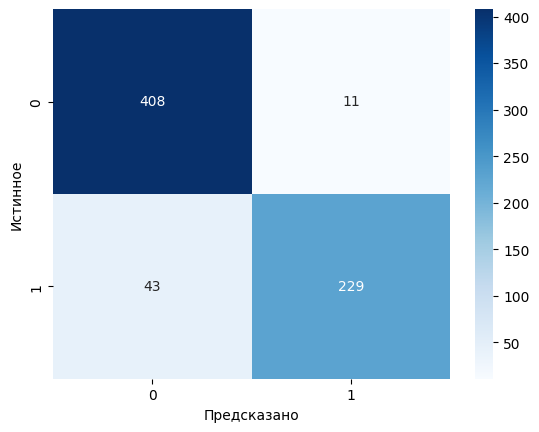

In [22]:
y_pred = (best_model.predict(best_X_test) > 0.5).astype(int)

sns.heatmap(confusion_matrix(best_y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Предсказано")
plt.ylabel("Истинное")
plt.show()
